In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io, viewer
import pandas as pd
import seaborn as sns

/Users/romakindmitriy/anaconda3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


image matrix size:  (290, 304, 3)


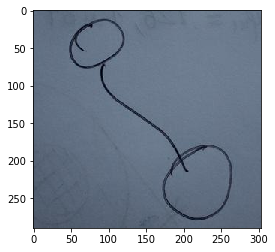

In [5]:
img = cv.imread('2.JPG')  # load the image as grayscale
print('image matrix size: ', img.shape)      # print the size of image
# print('\n First 5 columns and rows of the image matrix: \n', img[:5,:5]*255) 
plt.imshow(img)
plt.show()

## обработка изображения

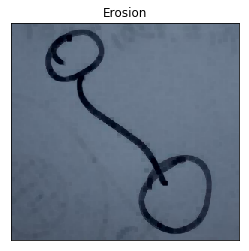

In [6]:
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# plt.imshow(thresh, 'gray')
# # plt.savefig('bbcon.png')
# plt.show()
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(img, kernel, iterations = 1)
plt.imshow(erosion, 'gray')
plt.title("Erosion"), plt.xticks([]), plt.yticks([])
#plt.savefig('get.png')
plt.show()

## height, width, channels

In [7]:
img.shape
# height, width, channels

(290, 304, 3)

In [8]:
x = []
y = []
data = []
datamean = []
datamin = []
datamax = []
l = 0
for i in range(1, img.shape[1] + 1): # width
    dataline = []
    for j in img[:,(i-1):i]: # height
        num = 0
        for k in j:
            num = sum(k)/765
            dataline.append(num)
        # x
        x.append(l)
        l += 1
        # y
        y.append(num)
    y = list(set(y))
    data.append([round(np.max(dataline), 3), round(np.mean(dataline), 3), round(np.min(dataline), 3)])
    datamean.append(round(np.mean(dataline), 3))
    datamin.append(round(np.min(dataline), 3))
    datamax.append(round(np.max(dataline), 3))

plt.figure(dpi=1800)
plt.axes(xlabel='time', ylabel='0 (black) -> 1 (white)',
       title='Pixels')
plt.plot(y)
plt.savefig("pixelsbb.png")
plt.show()

# def findlocmax(datamean, datamin):
#     dataminfix = datamin
#     datameanfix = datamean
#     m = round(np.median(datamin), 1)
#     n = np.min(datameanfix) - np.max(dataminfix)
#     while n < m:
#         dataminfix.remove(np.max(dataminfix))
#         n = np.min(datameanfix) - np.max(dataminfix)
#     return dataminfix

# print(np.max(findlocmax(datamean, datamin)))
# ar = findlocmax(datamean, datamin)
# datamin

In [9]:
plt.figure(dpi=1800)
plt.axes(xlabel='width', ylabel='0 (black) -> 1 (white)',
       title='Max - Mean - Min')
plt.plot(datamean)
plt.plot(datamin)
plt.plot(datamax)
plt.savefig("mean_min.png")
plt.show()

## Find coordinates of a Canny Edge Image - OpenCV & python

In [ ]:
import cv2
import numpy as np

img = cv2.imread('1.jpg', 0)
edges = cv2.Canny(img, 100, 255)

# Find coordinates of edges
indices = np.where(edges != [0])
print(indices)
coordinates = zip(indices[0], indices[1])

# Imshow image
cv2.imshow('image',edges)
cv2.waitKey(0)

(array([ 136,  136,  136, ..., 1291, 1291, 1291]), array([753, 754, 755, ..., 409, 410, 411]))


# Tracker_pix
## Find start tracking

In [ ]:
import cv2
import numpy as np
import imutils
import math
from PIL import Image
from matplotlib import pyplot as plt

img = cv2.imread('58.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('BGR2GRAY',gray)

edges = cv2.Canny(img, 100, 255)
# Imshow image
cv2.imshow('Canny',edges)

# remove noise
gauss = cv2.GaussianBlur(img,(3,3),0)
# Imshow image
cv2.imshow('GaussianBlur', gauss)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
# Imshow image
cv2.imshow('laplacian',laplacian)

sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=5) # x and y
# Imshow image
cv2.imshow('Sobel', sobelxy)

cv2.waitKey(0)

In [1]:
import cv2
import numpy as np
import imutils
import math
from PIL import Image
from matplotlib import pyplot as plt

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# multi
# gray -> Gauss
imeg = cv2.GaussianBlur(gray,(3, 3), 0)
# Imshow image
cv2.imshow('gray -> Gauss', imeg)

# gray -> Gauss -> Canny <- THE BEST
can1 = cv2.Canny(imeg, 100, 255)
# Imshow image
# cv2.imshow('gray -> Gauss -> Canny', can1)

# gray -> Canny
can2 = cv2.Canny(gray, 100, 255)
# Imshow image
#cv2.imshow('gray -> Canny', can2)

# Gauss -> Canny
can3 = cv2.Canny(imeg, 100, 255)
# Imshow image
#cv2.imshow('Gauss -> Canny', can3)

# # gray -> Gauss -> laplacian
# laplacian = cv2.Laplacian(imeg,cv2.CV_64F)
# # Imshow image
# cv2.imshow('gray -> Gauss -> laplacian', laplacian)

# # gray -> Gauss -> Sobel
# sobelxy = cv2.Sobel(imeg,cv2.CV_64F,1,1,ksize=5)
# # Imshow image
# cv2.imshow('gray -> Gauss -> Sobel', sobelxy)

# cv2.waitKey(0)

In [2]:
# # Find coordinates of edges
# indices = np.where(edges != [0])
# # print('y: ', indices[0], '\nx: ', indices[1])
# coordinates = zip(indices[0], indices[1])

# function to get start coordinates
def getcoor(image):
    edges = cv2.Canny(image, 100, 255)
    # Find coordinates of edges
    indices = np.where(edges != [0])
#     print('y: ', indices[0], '\nx: ', indices[1])
    coordinates = zip(indices[1], indices[0])
    
    # min x and min y
#     minx = min(indices[1])
#     miny = min(indices[0])
    ystart = indices[0][0]
    xstart = indices[1][0]
    dmin = math.ceil(math.sqrt(indices[1][0]**2 + indices[0][0]**2))
#     print(dmin)
    for i in range(1, len(indices[0])):
        d = math.ceil(math.sqrt(indices[1][i]**2 + indices[0][i]**2))
        if d < dmin:
            ystart = indices[0][i]
            xstart = indices[1][i]
            dmin = d
            # print(dmin)
    return ([ystart, xstart], [indices[0], indices[1]])

start, coord = getcoor(imeg)
print(start, coord)

[393, 252] [array([ 136,  136,  136, ..., 1291, 1291, 1291]), array([753, 754, 755, ..., 408, 409, 410])]


In [3]:
import cv2
import numpy as np
import imutils
import math
from PIL import Image
from matplotlib import pyplot as plt

img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imeg = cv2.GaussianBlur(gray,(3,3),0)
edges = cv2.Canny(imeg, 100, 255)


print(edges)
print('w = ', len(edges[0]), 'h = ', len(edges))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
w =  112 h =  112


In [4]:
# get first position from function getcoor
# init rectangle of pixels
rectdet = []
sizerect = 5

# h
for i in range(1, len(edges)):
    # w
    for j in range(1, len(edges[0])):
        if ((math.fabs(i - start[0]) <= 3) & (math.fabs(j - start[1]) <= 3)):
            rectdet.append([i,j])

#print(rectdet)
# print(len(rectdet))

# cv2.rectangle(img,(rectdet[0][1]-1,rectdet[0][0]-1),(rectdet[0][1]+8,rectdet[0][0]+8),(0,255,0),1)
# cv2.imshow('Edges',img)
# cv2.waitKey(0)

# make coordinates in simple form
detcoord = []

for i in range(0, len(coord[0])):
    detcoord.append([coord[0][i], coord[1][i]])

print(detcoord)
# print(len(detcoord))



[[136, 753], [136, 754], [136, 755], [136, 756], [136, 757], [136, 758], [136, 759], [136, 760], [136, 765], [136, 766], [137, 748], [137, 749], [137, 750], [137, 751], [137, 752], [137, 753], [137, 761], [137, 762], [137, 763], [137, 764], [137, 767], [137, 768], [137, 769], [137, 770], [137, 771], [137, 772], [137, 773], [137, 774], [137, 775], [138, 744], [138, 745], [138, 746], [138, 747], [138, 776], [138, 777], [138, 778], [138, 779], [139, 743], [139, 744], [139, 757], [139, 758], [139, 759], [139, 779], [139, 780], [140, 741], [140, 742], [140, 743], [140, 754], [140, 755], [140, 756], [140, 760], [140, 761], [140, 762], [140, 763], [140, 764], [140, 765], [140, 766], [140, 767], [140, 768], [140, 780], [140, 781], [140, 782], [141, 737], [141, 738], [141, 739], [141, 740], [141, 749], [141, 750], [141, 751], [141, 752], [141, 753], [141, 768], [141, 769], [141, 770], [141, 771], [141, 772], [141, 773], [141, 783], [141, 784], [141, 785], [141, 786], [142, 736], [142, 737], [14